In [1]:
import CNN2Head_input2 as CNN2Head_input
import tensorflow as tf
import numpy as np
import BKNetStyle2 as BKNetStyle
from const import *
import cv2

from IPython.display import Image, display
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
sess = tf.InteractiveSession()
x, y_, mask = BKNetStyle.Input()

y_smile_conv, y_gender_conv, y_age_conv, phase_train, keep_prob = BKNetStyle.BKNetModel(x)

In [3]:
smile_loss, gender_loss, age_loss, l2_loss, loss = BKNetStyle.selective_loss(y_smile_conv, y_gender_conv,
                                                                             y_age_conv, y_, mask)
print('Restore model')
saver = tf.train.Saver()
saver.restore(sess, './save/current5/model-age101.ckpt.index')
print('OK')


Restore model
INFO:tensorflow:Restoring parameters from ./save/current5/model-age101.ckpt.index
OK


In [4]:
detector = MTCNN()

In [5]:
def predict(PATH):
    img = cv2.imread(PATH)
    result = detector.detect_faces(img)
    face_position = result[0].get('box')
    x_coordinate = face_position[0]
    y_coordinate = face_position[1]
    w_coordinate = face_position[2]
    h_coordinate = face_position[3]
    img = img[y_coordinate:y_coordinate+h_coordinate, x_coordinate:x_coordinate+w_coordinate]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(48, 48))

    img = (img - 128) / 255.0
    T = np.zeros([48, 48, 1])
    T[:, :, 0] = img
    test_img = []
    test_img.append(T)
    test_img = np.asarray(test_img)

    display(Image(filename = PATH, width=100, height=100))

    predict_y_smile_conv = sess.run(y_smile_conv, feed_dict={x: test_img, phase_train: False, keep_prob: 1})
    predict_y_gender_conv = sess.run(y_gender_conv, feed_dict={x: test_img, phase_train: False, keep_prob: 1})
    predict_y_age_conv = sess.run(y_age_conv, feed_dict={x: test_img, phase_train: False, keep_prob: 1})

    smile_label = "No " if np.argmax(predict_y_smile_conv)==0 else "Yes "
    gender_label = "Female " if np.argmax(predict_y_gender_conv)==0 else "Male "

    print('Smile: ' + smile_label)
    print('Gender: ' + gender_label)
    print('Age: ' + str(np.argmax(predict_y_age_conv)))

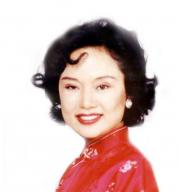

Smile: Yes 
Gender: Female 
Age: 39


In [6]:
PATH = '/home/ubuntu/coding/cnn/datasets/genki4k/files/file0009.jpg'
predict(PATH)

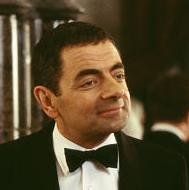

Smile: No 
Gender: Male 
Age: 21


In [7]:
PATH = '/home/ubuntu/coding/cnn/datasets/imdb_crop/00/nm0000100_rm3653409024_1955-1-6_2003.jpg'
predict(PATH)

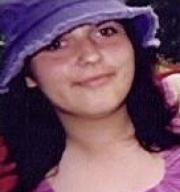

Smile: No 
Gender: Female 
Age: 21


In [8]:
PATH = '/home/ubuntu/coding/cnn/datasets/genki4k/files/file0019.jpg'
predict(PATH)

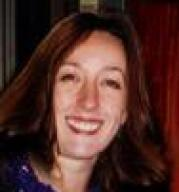

Smile: Yes 
Gender: Female 
Age: 21


In [9]:
PATH = '/home/ubuntu/coding/cnn/datasets/genki4k/files/file0010.jpg'
predict(PATH)

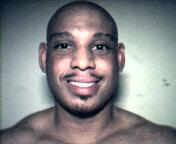

Smile: Yes 
Gender: Male 
Age: 45


In [10]:
PATH = '/home/ubuntu/coding/cnn/datasets/genki4k/files/file0011.jpg'
predict(PATH)

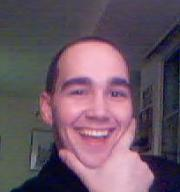

Smile: No 
Gender: Female 
Age: 21


In [11]:
PATH = '/home/ubuntu/coding/cnn/datasets/genki4k/files/file0012.jpg'
predict(PATH)

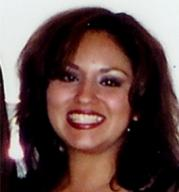

Smile: Yes 
Gender: Male 
Age: 25


In [12]:
PATH = '/home/ubuntu/coding/cnn/datasets/genki4k/files/file0013.jpg'
predict(PATH)

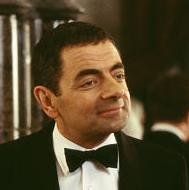

Smile: No 
Gender: Male 
Age: 21


In [13]:
PATH = '/home/ubuntu/coding/cnn/datasets/imdb_crop/00/nm0000100_rm3653409024_1955-1-6_2003.jpg'
predict(PATH)

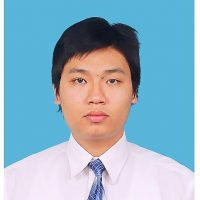

Smile: No 
Gender: Female 
Age: 21


In [14]:
PATH = '/home/ubuntu/coding/cnn/datasets/soict/anhdt.jpg'
predict(PATH)

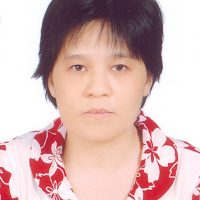

Smile: Yes 
Gender: Male 
Age: 21


In [15]:
PATH = '/home/ubuntu/coding/cnn/datasets/soict/anhnk.jpg'
predict(PATH)

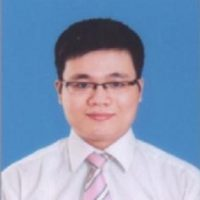

Smile: Yes 
Gender: Male 
Age: 21


In [16]:
PATH = '/home/ubuntu/coding/cnn/datasets/soict/bangbh.jpg'
predict(PATH)

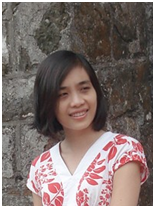

Smile: No 
Gender: Male 
Age: 21


In [17]:
PATH = '/home/ubuntu/coding/cnn/datasets/soict/binhhtt.png'
predict(PATH)

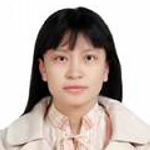

Smile: No 
Gender: Female 
Age: 21


In [18]:
PATH = '/home/ubuntu/coding/cnn/datasets/soict/giangvth.jpg'
predict(PATH)

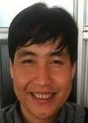

Smile: Yes 
Gender: Male 
Age: 39


In [19]:
PATH = '/home/ubuntu/coding/cnn/datasets/soict/haipd.jpg'
predict(PATH)

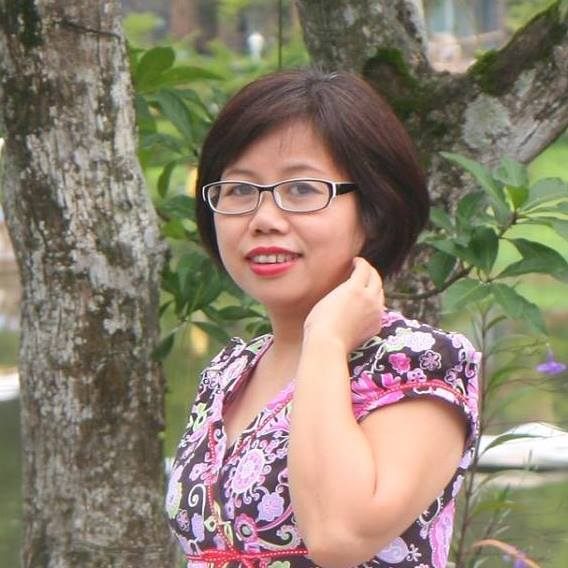

Smile: No 
Gender: Female 
Age: 21


In [20]:
PATH = '/home/ubuntu/coding/cnn/datasets/soict/hiennt.jpg'
predict(PATH)

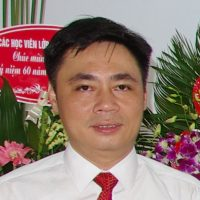

Smile: No 
Gender: Male 
Age: 21


In [21]:
PATH = '/home/ubuntu/coding/cnn/datasets/soict/hoangph.jpg'
predict(PATH)

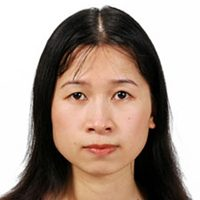

Smile: No 
Gender: Female 
Age: 21


In [22]:
PATH = '/home/ubuntu/coding/cnn/datasets/soict/huonglt.jpg'
predict(PATH)

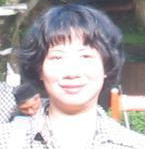

Smile: No 
Gender: Male 
Age: 21


In [23]:
PATH = '/home/ubuntu/coding/cnn/datasets/soict/huongntt.jpg'
predict(PATH)

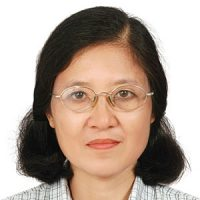

Smile: No 
Gender: Female 
Age: 20


In [24]:
PATH = '/home/ubuntu/coding/cnn/datasets/soict/lannth.jpg'
predict(PATH)

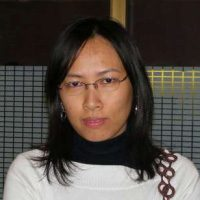

Smile: No 
Gender: Female 
Age: 21


In [25]:
PATH = '/home/ubuntu/coding/cnn/datasets/soict/linh.jpg'
predict(PATH)

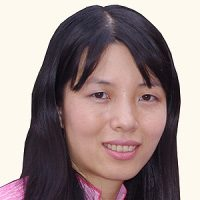

Smile: Yes 
Gender: Female 
Age: 21


In [26]:
PATH = '/home/ubuntu/coding/cnn/datasets/soict/maibtq.jpg'
predict(PATH)

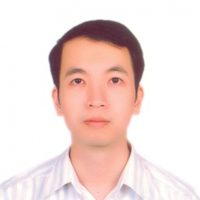

Smile: No 
Gender: Female 
Age: 30


In [27]:
PATH = '/home/ubuntu/coding/cnn/datasets/soict/phuongnh.jpg'
predict(PATH)

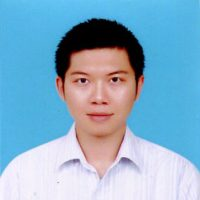

Smile: No 
Gender: Female 
Age: 21


In [28]:
PATH = '/home/ubuntu/coding/cnn/datasets/soict/sangdv.jpg'
predict(PATH)

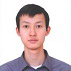

Smile: No 
Gender: Female 
Age: 25


In [29]:
PATH = '/home/ubuntu/coding/cnn/datasets/soict/thuandp.jpg'
predict(PATH)

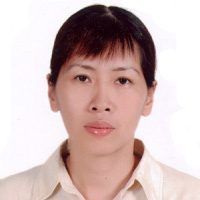

Smile: No 
Gender: Female 
Age: 21


In [30]:
PATH = '/home/ubuntu/coding/cnn/datasets/soict/thunq.jpg'
predict(PATH)

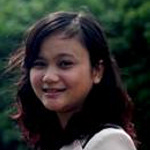

Smile: Yes 
Gender: Male 
Age: 45


In [31]:
PATH = '/home/ubuntu/coding/cnn/datasets/soict/trangntt.jpg'
predict(PATH)

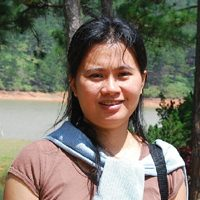

Smile: Yes 
Gender: Female 
Age: 21


In [32]:
PATH = '/home/ubuntu/coding/cnn/datasets/soict/trinhvt.jpg'
predict(PATH)

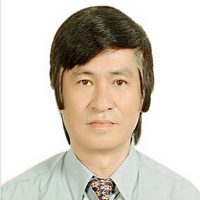

Smile: No 
Gender: Female 
Age: 30


In [33]:
PATH = '/home/ubuntu/coding/cnn/datasets/soict/nghiand.jpg'
predict(PATH)

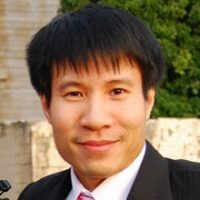

Smile: Yes 
Gender: Male 
Age: 21


In [34]:
PATH = '/home/ubuntu/coding/cnn/datasets/soict/dungpq.jpg'
predict(PATH)

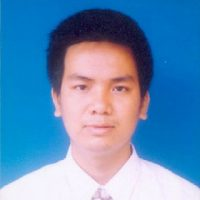

Smile: No 
Gender: Female 
Age: 33


In [35]:
PATH = '/home/ubuntu/coding/cnn/datasets/soict/dungnt.jpg'
predict(PATH)

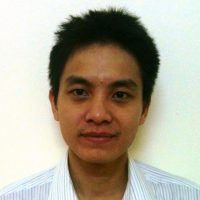

Smile: No 
Gender: Male 
Age: 25


In [36]:
PATH = '/home/ubuntu/coding/cnn/datasets/soict/ductv.jpg'
predict(PATH)

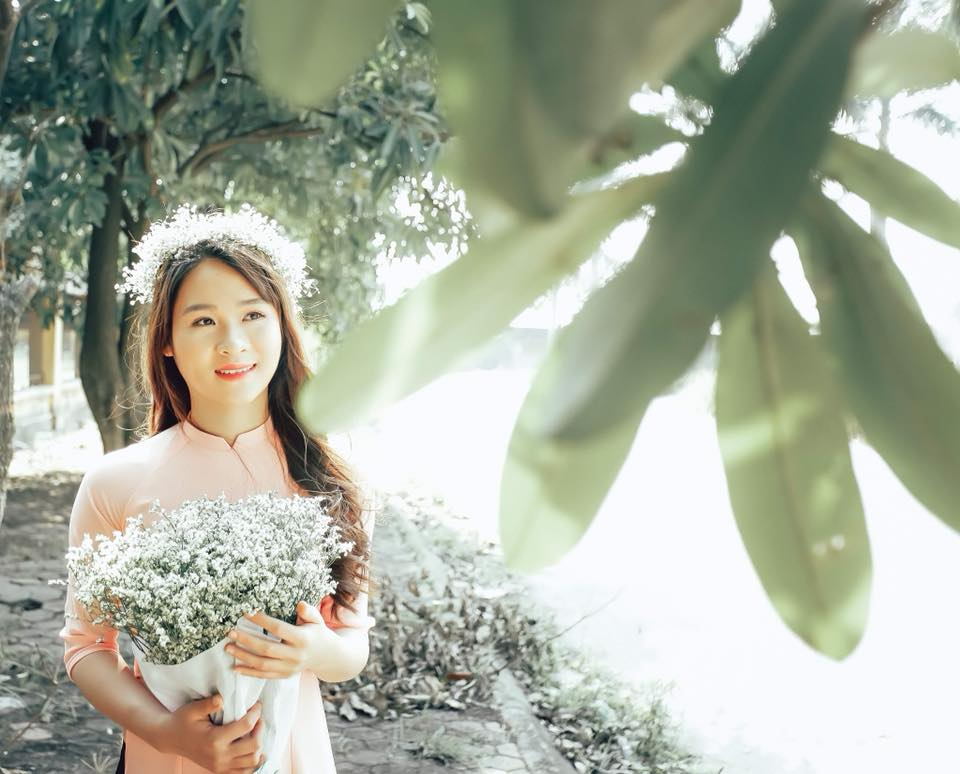

Smile: No 
Gender: Female 
Age: 21


In [37]:
PATH = '/home/ubuntu/coding/cnn/datasets/friends/bababi.jpg'
predict(PATH)

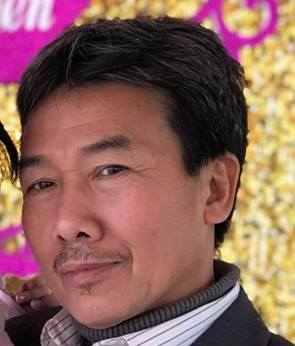

Smile: No 
Gender: Male 
Age: 21


In [38]:
PATH = '/home/ubuntu/coding/cnn/datasets/friends/dinhnv.jpg'
predict(PATH)

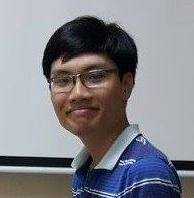

Smile: Yes 
Gender: Male 
Age: 45


In [39]:
PATH = '/home/ubuntu/coding/cnn/datasets/friends/hieunt.jpg'
predict(PATH)

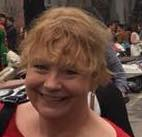

Smile: Yes 
Gender: Male 
Age: 46


In [40]:
PATH = '/home/ubuntu/coding/cnn/datasets/friends/human1.jpg'
predict(PATH)

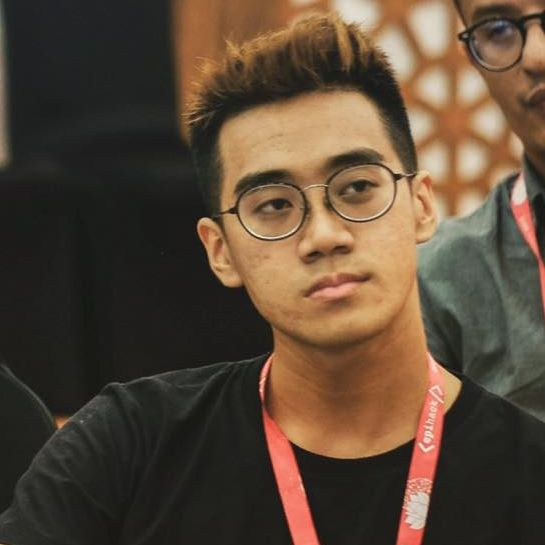

Smile: No 
Gender: Female 
Age: 21


In [41]:
PATH = '/home/ubuntu/coding/cnn/datasets/friends/kiendt.jpg'
predict(PATH)

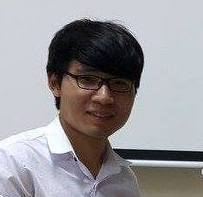

Smile: Yes 
Gender: Male 
Age: 21


In [42]:
PATH = '/home/ubuntu/coding/cnn/datasets/friends/linhnd.jpg'
predict(PATH)

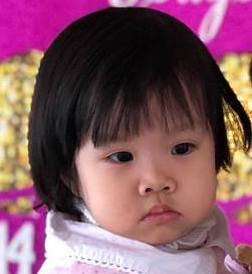

Smile: No 
Gender: Male 
Age: 46


In [43]:
PATH = '/home/ubuntu/coding/cnn/datasets/friends/linhnh.jpg'
predict(PATH)

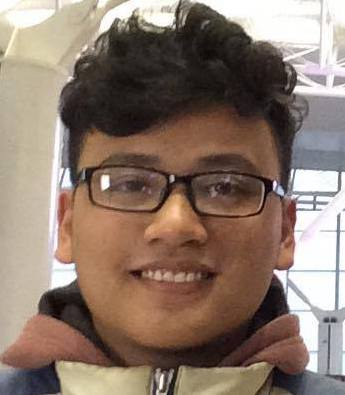

Smile: Yes 
Gender: Male 
Age: 51


In [44]:
PATH = '/home/ubuntu/coding/cnn/datasets/friends/minhbd.jpg'
predict(PATH)

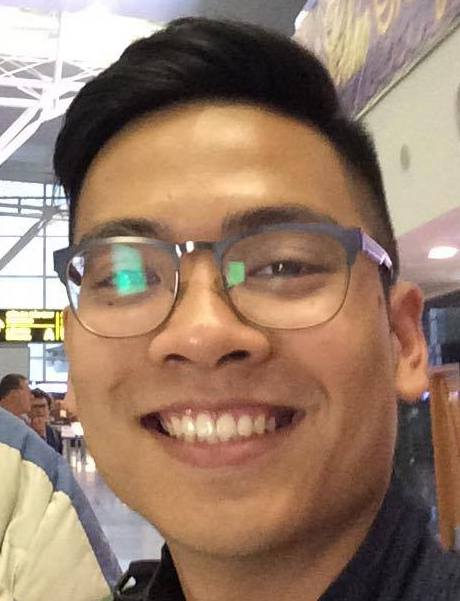

Smile: No 
Gender: Female 
Age: 21


In [45]:
PATH = '/home/ubuntu/coding/cnn/datasets/friends/minhbd2.jpg'
predict(PATH)

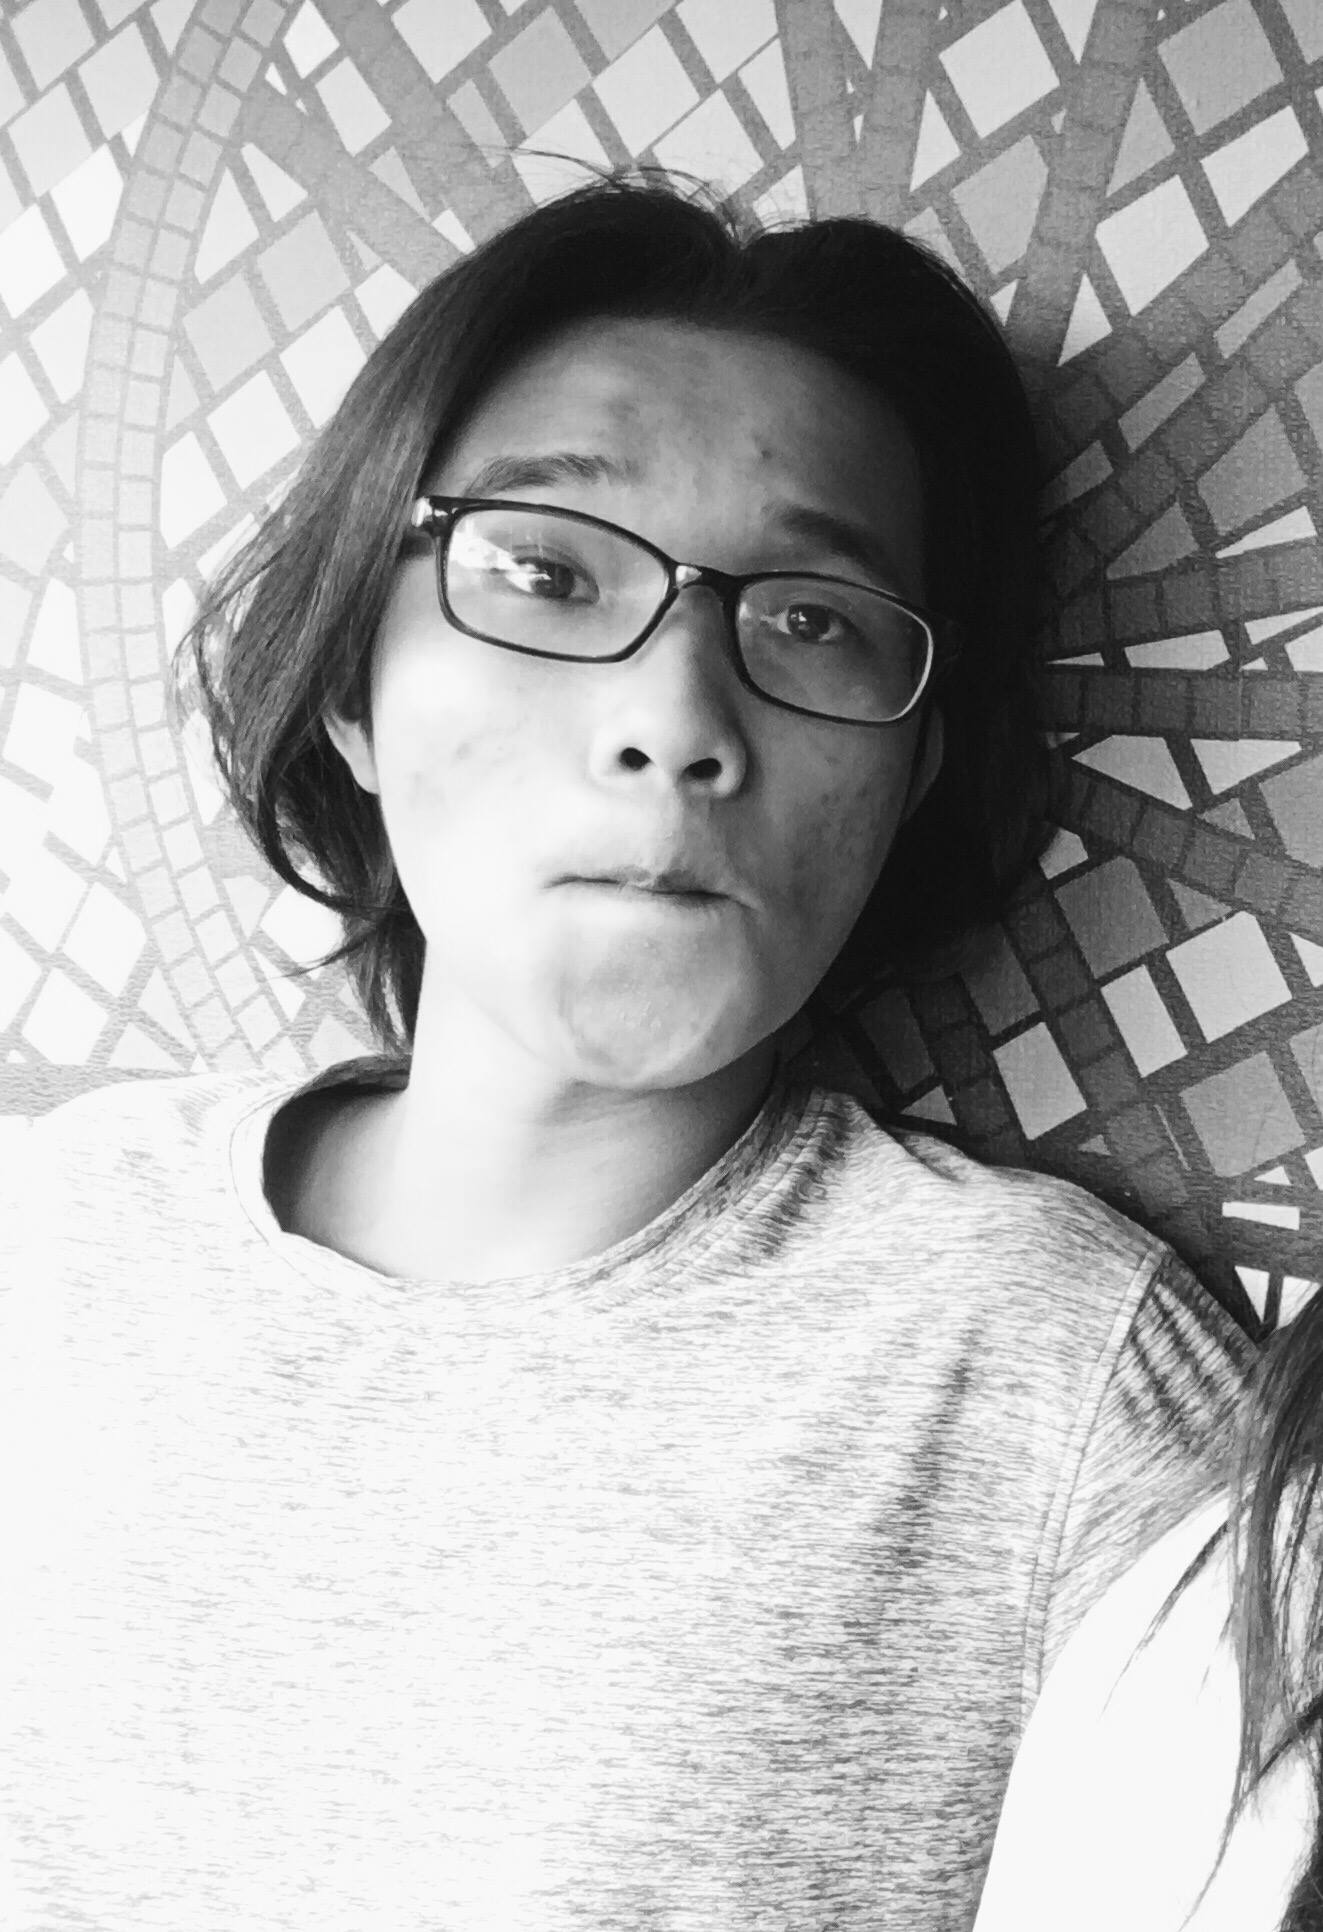

Smile: No 
Gender: Male 
Age: 27


In [46]:
PATH = '/home/ubuntu/coding/cnn/datasets/friends/sontbv.jpg'
predict(PATH)

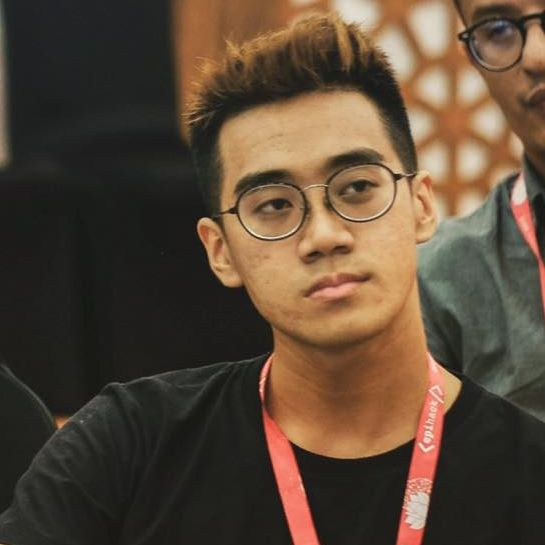

Smile: No 
Gender: Female 
Age: 21


In [47]:
PATH = '/home/ubuntu/coding/cnn/datasets/friends/kiendt.jpg'
predict(PATH)

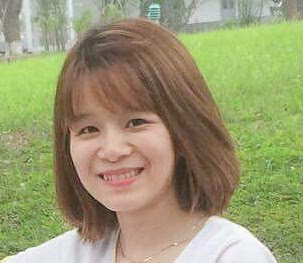

Smile: Yes 
Gender: Female 
Age: 25


In [48]:
PATH = '/home/ubuntu/coding/cnn/datasets/friends/nhict.jpg'
predict(PATH)

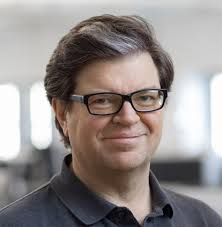

Smile: No 
Gender: Female 
Age: 21


In [49]:
PATH = '/home/ubuntu/coding/cnn/datasets/friends/yannlecun.jpeg'
predict(PATH)

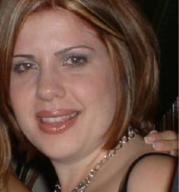

Smile: No 
Gender: Female 
Age: 21


In [50]:
PATH = '/home/ubuntu/coding/cnn/datasets/genki4k/files/file0085.jpg'
predict(PATH)

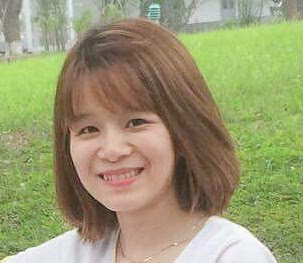

Smile: Yes 
Gender: Female 
Age: 25


In [51]:
PATH = '/home/ubuntu/coding/cnn/datasets/friends/nhict.jpg'
predict(PATH)

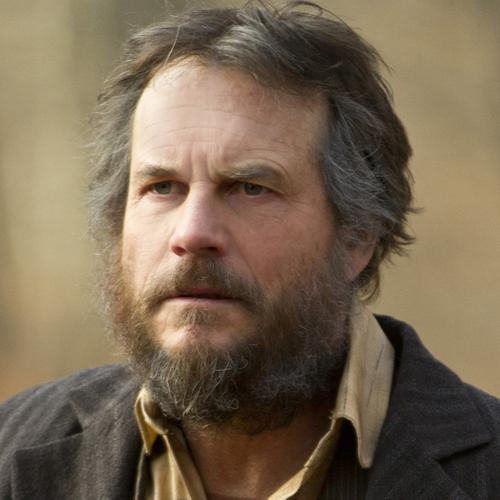

Smile: No 
Gender: Male 
Age: 21


In [7]:
PATH = '/Users/truongnm/coding/cnn/datasets/imdb_crop/00/nm0000200_rm3770332416_1955-5-17_2012.jpg'
predict(PATH)